In [1]:
import numpy as np
from scipy.special import hankel1
import matplotlib.pyplot as plt

In [15]:
def U(x,y,U0 = 1, k = 512,sigma = 1):
    return U0*np.exp(1j*k*x-(y**2)/(2*sigma**2))

def Integranda(x,y,xs,ys,k = 512):
    return U(xs,ys)*hankel1(0,np.sqrt((x-xs)**2+(y-ys)**2)*k)*np.pi*1j


def plotfunc(a,b,N,f,nome=''):
    X = np.linspace(a,b,N)
    Y = f(X)
    plt.plot(X,Y,label=nome)
    plt.legend()

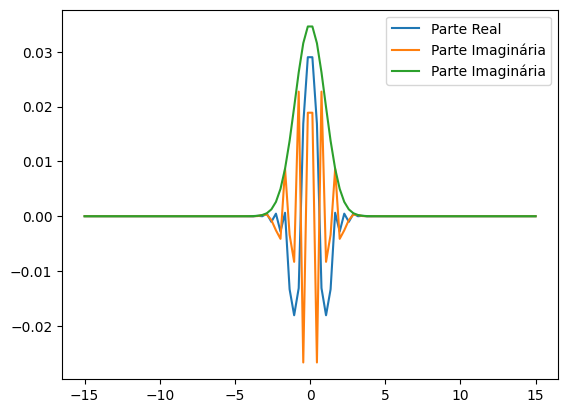

In [18]:
plotfunc(-15,15,100,lambda y : Integranda(10,0,0,y).real ,"Parte Real")
plotfunc(-15,15,100,lambda y : Integranda(10,0,0,y).imag , "Parte Imaginária")
plotfunc(-15,15,100,lambda y : abs(Integranda(10,0,0,y)) , "Parte Imaginária")


In [14]:
def SimpsonAdaptative(a,b,f):
    e0 = np.inf
    S0 = (f(a)+f(b))/3
    T0 = 2*f((a+b)/2)/3
    I0 = (a-b)*(S0+2*T0)/2
    n = 2
    print("I\te")
    while True:
        N = 2*n+1

        S = S0+T0
        S0 = S
        
        t, h = np.linspace(a,b,N,retstep=1)
        T = 2*np.sum(f(t[1:-1:2]))/3
        T0 = T

        I = h*(S+2*T)
        e = abs(I-I0)/15 
        
        
        if abs(e-e0)<10**-17:
            break
        e0 = e
        I0 = I
        print(I,"\t", e)
        n *= 2
    return I


In [5]:
SimpsonAdaptative(-15,15,lambda y : Integranda(10,0,0,y))

I	e
(0.1751460388857386-0.0018656564608493435j) 	 0.05838532503160528
(0.08731999002263291-0.0007724102278703654j) 	 0.005855523525785262
(0.053239712393153+0.027962013105418296j) 	 0.002971817556534925
(-0.02773054942354928-0.018636638380529973j) 	 0.00622811461357972
(0.04835821228239725-0.024570159811945193j) 	 0.005087984248106897
(0.029119615226167697+0.005025908366806576j) 	 0.0023532963815165856
(-0.006934285879391902-0.0019232792534102587j) 	 0.002447833503334414
(0.014142146893154208+0.01310335192011683j) 	 0.0017256440508992214
(0.008059891251896063+0.008204783244484792j) 	 0.0005206398147386645
(0.008851784263199462+0.00849775544336452j) 	 5.629001295543122e-05
(0.008851810762369731+0.008497971265837045j) 	 1.4496213401662093e-08
(0.008851810762367657+0.008497971265837888j) 	 1.4929877661167806e-16
(0.008851810762367488+0.008497971265838525j) 	 4.390034904998478e-17


(0.00885181076236789+0.008497971265838143j)

In [82]:
def RombergTable(a,b,emin,f,retPoints=0,retError=0):
    e = np.inf
    h = (b-a)
    N = int(np.log(h/emin))
    E = np.zeros(N)
    Points = np.zeros(N)
    R = np.zeros((N,N),dtype=complex)
    R[0, 0] = ((f(a)+f(b))*h)/2
    E[0] = e
    Points[0] = 1
    n = 1
    i = 1
    while E[i-1] > emin:
        Points[i] = 2*n+1
        t,h = np.linspace(a,b,int(Points[i]),retstep=1)
        R[i, 0] = R[i-1, 0] / 2 + np.sum(f(t[1:-1:2]))*h
        for m in range(i):
            R[i, m+1] = R[i, m] + (R[i, m]-R[i-1, m])/(4**(m+1) - 1)

        E[i] = abs(R[i, i-1]-R[i-1, i-1])/(4**i-1)
        i += 1
        n *= 2
    R = np.trim_zeros(np.diagonal(R))
    E = np.trim_zeros(E)
    Points = np.trim_zeros(Points)
    if not(retPoints or retError):
        return R
    if retPoints and not(retError):
        return R, Points
    if retError and not(retPoints):
        return R, E
    if retPoints and retError:
        return R, Points, E

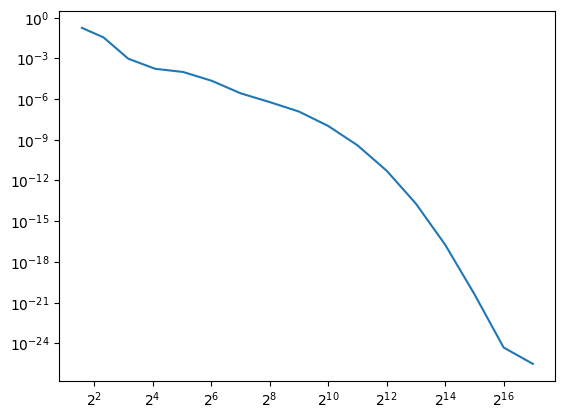

In [84]:
fig,ax = plt.subplots()


ax.plot(RombergTable(-15,15,10**-25,lambda y : Integranda(10,0,0,y),retPoints=1)[1],RombergTable(-15,15,10**-25,lambda y : Integranda(10,0,0,y),retError=1)[1])
ax.set_yscale("log")
ax.set_xscale("log",base=2)
plt.show()

In [ ]:
def Hermite